 # Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [2]:
data = pd.read_csv("C:/Users/Dell/Documents/customer_shopping_data.csv")

In [3]:
print(data)

      invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoic

In [4]:
print(data.head(5))

  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     8/5/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    11/9/2021       Metrocity  
3    Credit Card    5/16/2021    Metropol AVM  
4           Cash   10/24/2021          Kanyon  


In [5]:
print(data.tail(5))

      invoice_no customer_id  gender  age         category  quantity    price  \
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
99452    Credit Card    9/21/2022            Kanyon  
99453           Cash    9/22/2021    Forum Istanbul  
99454     Debit Card    3/28/2021         Metrocity  
99455           Cash    3/16/2021      Istinye Park  
99456    Credit Card   10/15/2022  Mall of Istanbul  


 # Checking for the missing values

In [6]:
pd.isnull(data).sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

# Information about the dataset

In [7]:
print(data.info())
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

##### Changing data type of invoice_date from object to datetime 

In [8]:
data['invoice_date']=pd.to_datetime(data['invoice_date'])

# Statistical information of the dataset

In [9]:
print(data.describe())

                age      quantity         price                invoice_date
count  99457.000000  99457.000000  99457.000000                       99457
mean      43.427089      3.003429    689.256321  2022-02-04 02:46:59.783424
min       18.000000      1.000000      5.230000         2021-01-01 00:00:00
25%       30.000000      2.000000     45.450000         2021-07-19 00:00:00
50%       43.000000      3.000000    203.300000         2022-02-05 00:00:00
75%       56.000000      4.000000   1200.320000         2022-08-22 00:00:00
max       69.000000      5.000000   5250.000000         2023-03-08 00:00:00
std       14.990054      1.413025    941.184567                         NaN


In [10]:
data.describe(include = 'object')

,invoice_no,customer_id,gender,category,payment_method,shopping_mall
count,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,10
top,I232867,C273973,Female,Clothing,Cash,Mall of Istanbul
freq,1,1,59482,34487,44447,19943


# Checking the Structure of the dataset

In [11]:
data.shape
print(f'Records : {data.shape[0]}')
print(f'Columns : {data.shape[1]}')

Records : 99457
Columns : 10


# Checking for duplicates in the dataset 

In [12]:
data["invoice_no"].duplicated().sum()

np.int64(0)

In [13]:
data['customer_id'].duplicated().sum()

np.int64(0)

# Adding calculated columns for more precise study of dataset

In [14]:
data.loc[(data['quantity'] > 2) , "QuantityPurchased"] = 'more quantity purchased'
data.loc[(data['quantity'] <=2) , "QuantityPurchased"] = 'less quantity purchased'

In [15]:
data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,QuantityPurchased
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,more quantity purchased
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,more quantity purchased
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,less quantity purchased
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,more quantity purchased
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,more quantity purchased
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,more quantity purchased
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,less quantity purchased
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,less quantity purchased
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,more quantity purchased


In [16]:
data["QuantityPurchased"].value_counts()

QuantityPurchased
more quantity purchased    59862
less quantity purchased    39595
Name: count, dtype: int64

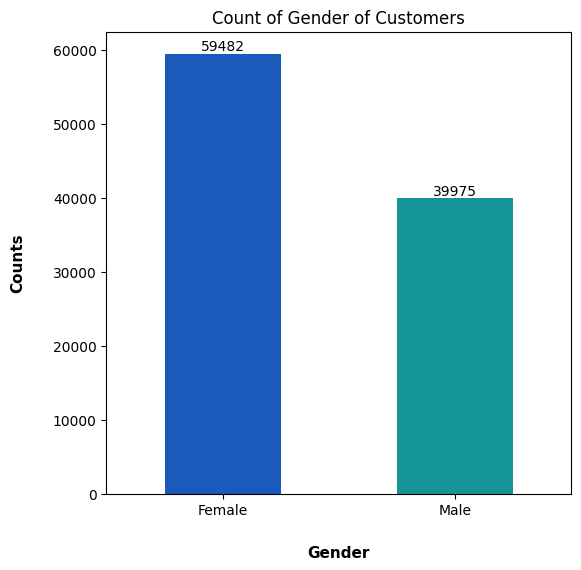

In [17]:
plt.figure(figsize= (6,6))
gender_count = sns.countplot(x = "gender", data = data, hue = 'gender', width = 0.5, palette = 'winter')
plt.title("Count of Gender of Customers")
plt.xlabel('Gender', weight = "bold", fontsize = 11, labelpad = 20)
plt.ylabel('Counts', weight = "bold", fontsize = 11, labelpad = 20)
for bars in gender_count.containers:
    gender_count.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Saless'>

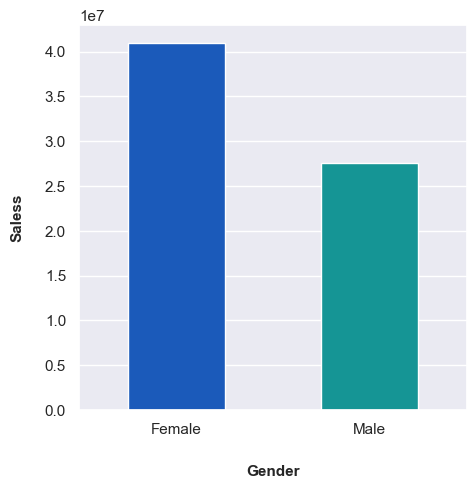

In [39]:
plt.figure(figsize = (5,5))
group_gender = data.groupby(["gender"], as_index=False)['price'].sum().sort_values(by = 'price', ascending = False)
plt.xlabel('Gender', weight = "bold", fontsize = 11, labelpad = 20)
plt.ylabel('Saless', weight = "bold", fontsize = 11, labelpad = 15)
sns.barplot(x = "gender", y = "price", width = 0.5, data = group_gender, hue = "gender", palette = 'winter')

In [19]:
data.groupby(["gender"], as_index=False)['price'].sum().sort_values(by = 'price', ascending = False)

,gender,price
0,Female,40931801.62
1,Male,27619564.29


##### The above graph shows that there are more number of female customers than male customers and also the purchasing power power of female customers is more than that of male customers 

# Age distribution

In [40]:
mean = data['age'].mean()
print(f'The average age of customers is: {round(mean)} years old')

The average age of customers is: 43 years old


In [21]:
youngest = data['age'].min()
print(f'The youngest customer is: {youngest} years old')

The youngest customer is: 18 years old


In [22]:
oldest = data['age'].max()
print(f'The oldest customer is: {oldest} years old')

The oldest customer is: 69 years old


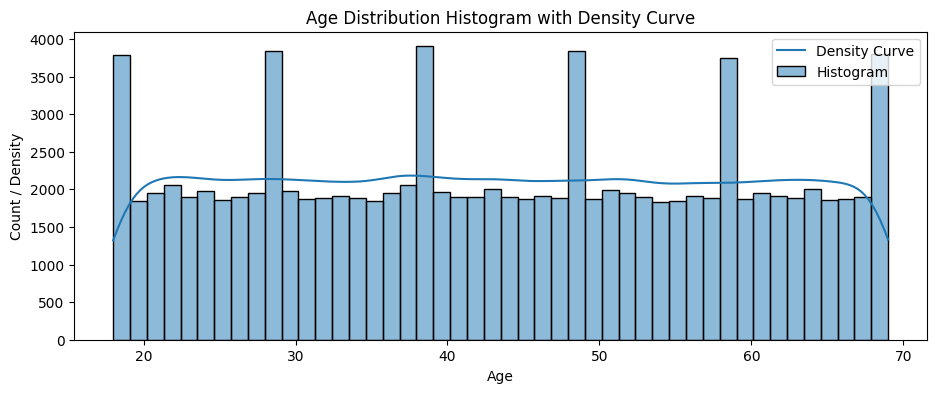

In [23]:
plt.figure(figsize = (11,4))
sns.histplot(data = data,  x = "age", kde = True, palette ="spring")
plt.xlabel('Age')
plt.ylabel('Count / Density')
plt.title('Age Distribution Histogram with Density Curve')
plt.legend(['Density Curve', 'Histogram'])
plt.show()

# Count of Categories

# Sales of each Category

In [24]:
total_sales_per_item = data.groupby('category')['price'].sum()
print(total_sales_per_item)

category
Books                226977.30
Clothing           31075684.64
Cosmetics           1848606.90
Food & Beverage      231568.71
Shoes              18135336.89
Souvenir             174436.83
Technology         15772050.00
Toys                1086704.64
Name: price, dtype: float64


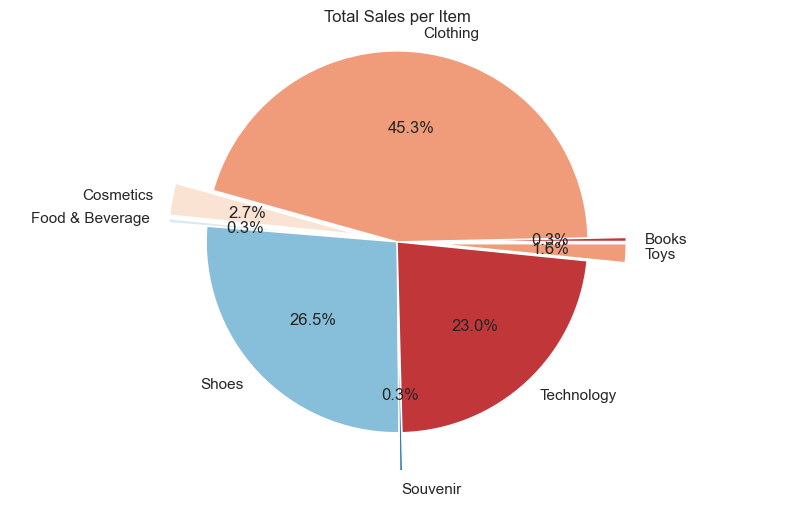

In [41]:
sales = total_sales_per_item.reset_index()
plt.figure(figsize=(10, 6))
sns.set_palette('RdBu')  
explode = [0.2, 0, 0.2, 0.2, 0, 0.2, 0 ,0.2]
plt.pie(sales['price'], labels=sales['category'], autopct='%1.1f%%', explode = explode)
plt.axis('equal') 
plt.title('Total Sales per Item')
plt.show()

# Quantities of each item purchased 

Text(0.5, 1.0, 'Item Purchased Quantity')

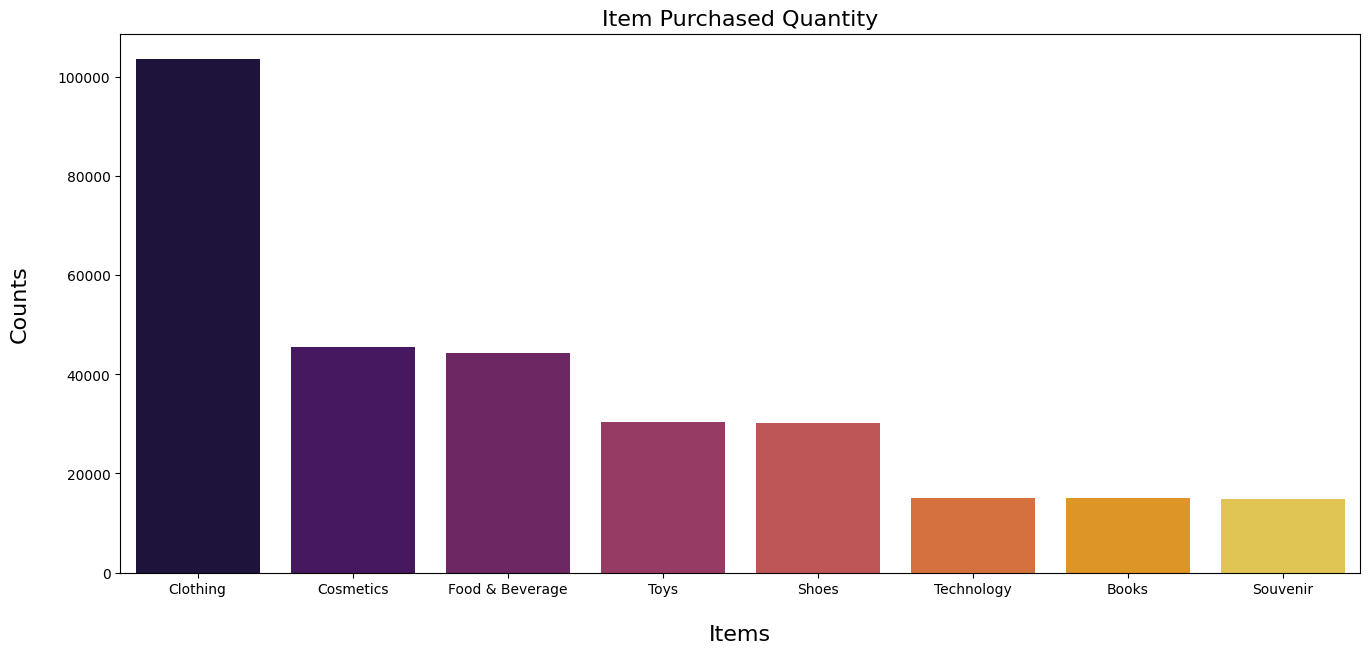

In [26]:
plt.figure(figsize = (16, 7))
total_quantity_per_item = data.groupby(['category'], as_index = False)['quantity'].sum().sort_values(by = 'quantity', ascending = False)
sns.barplot(data = total_quantity_per_item, x = "category", y = "quantity", palette = 'inferno')
plt.ylabel('Counts', fontsize = 16, labelpad = 20)
plt.xlabel('Items', fontsize = 16, labelpad = 20)
plt.title('Item Purchased Quantity', fontsize = 16)

In [27]:
data.groupby("category").agg({"gender" : "count"})

,gender
category,
Books,4981
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Shoes,10034
Souvenir,4999
Technology,4996
Toys,10087


##### Most sold item is clothing category followed by technology and shoes whereas only 0.3% of Food and beverage, Souvenir and Books are sold

# Statistics of Shopping Mall 

Text(0, 0.5, 'Quantity')

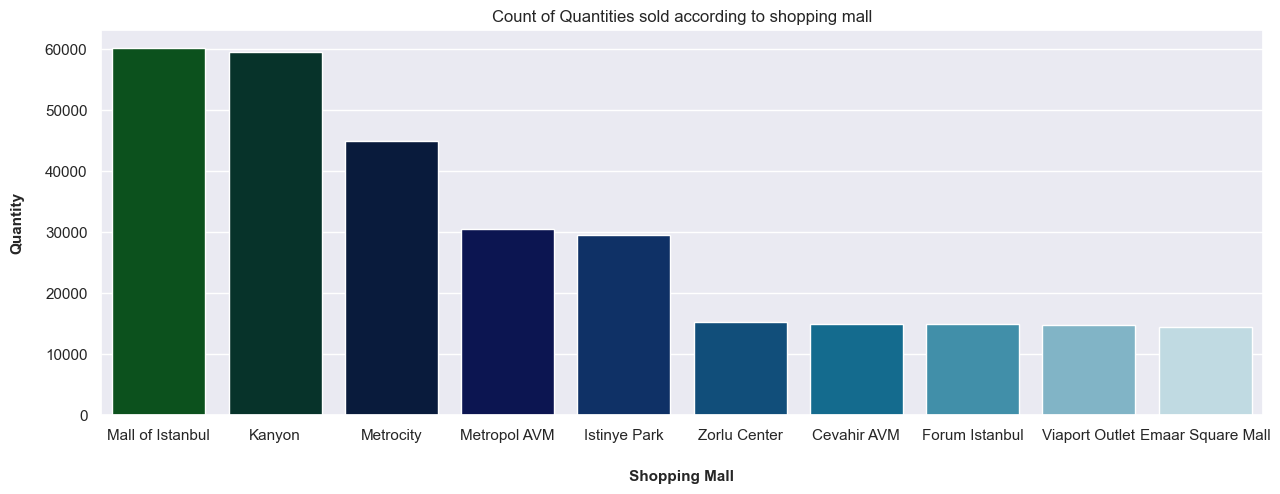

In [45]:
shopping_mall = data.groupby(["shopping_mall"], as_index =False)["quantity"].sum().sort_values(by = "quantity", ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (15,5)})
sns.barplot(data = shopping_mall, x = 'shopping_mall', y = 'quantity', palette ="ocean")

plt.title("Count of Quantities sold according to shopping mall")
plt.xlabel('Shopping Mall', weight = "bold", fontsize = 11, labelpad = 20)
plt.ylabel('Quantity', weight = "bold", fontsize = 11, labelpad = 15)

Text(0, 0.5, 'Sales')

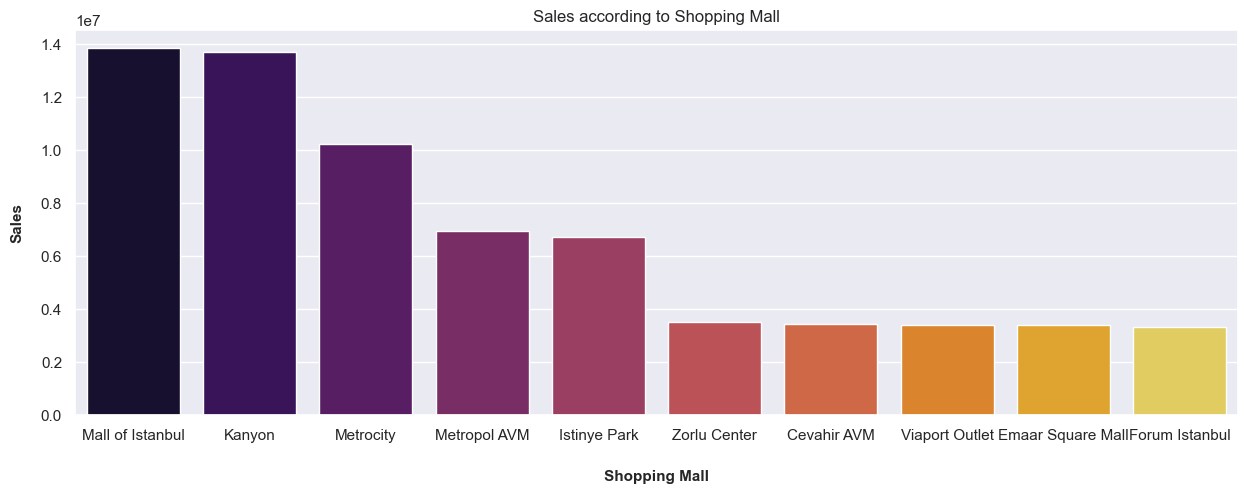

In [49]:
shopping_mall = data.groupby(["shopping_mall"], as_index =False)['price'].sum().sort_values(by = 'price', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (15,5)})





sns.barplot(data = shopping_mall, x = 'shopping_mall', y = 'price', palette = "inferno")




plt.title('Sales according to Shopping Mall')
plt.xlabel('Shopping Mall', weight = "bold", fontsize = 11, labelpad = 20)
plt.ylabel('Sales', weight = "bold", fontsize = 11, labelpad = 12)

##### The above graph shows that Mall of Istanbul and Metrocity is most popular Shopping Mall in terms of number of quantities and profit of goods sold. However, even after selling huge number of goods Emaar Square Mall and Forum Istanbul is gaining less profit.

# Number of customers paying through different mediums in all shopping malls

In [30]:
data['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

In [31]:
x = data['payment_method'].value_counts().index
y = data['payment_method'].value_counts().values

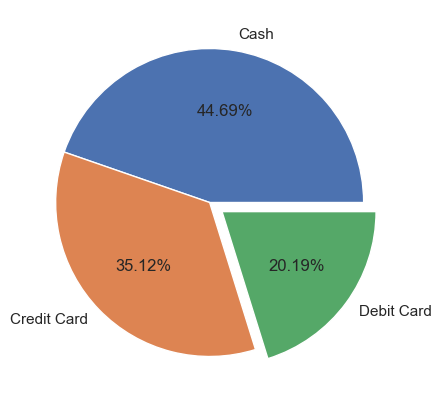

In [32]:
yy = [0, 0, 0.1]
plt.pie(y, labels = x, autopct= "%0.2f%%", explode= yy)
plt.show()

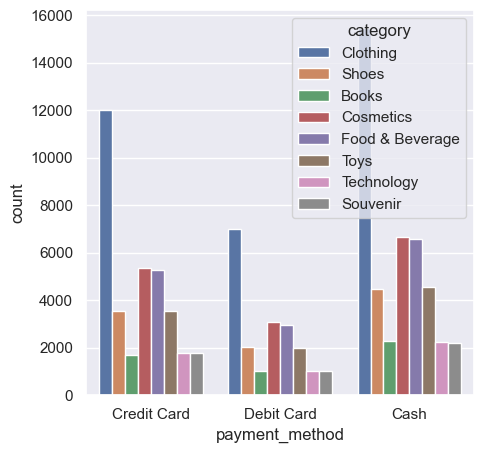

In [33]:
plt.figure(figsize = (5,5))
sns.countplot(x = 'payment_method', data = data, hue = 'category')
plt.show()

##### Customers prefer cash payment 

# Analysis according to Date

# Analysis of Monthly and Yearly Transactions 

In [34]:
data["sell_year"] = data['invoice_date'].dt.year

In [35]:
data["sell_year"].value_counts()

sell_year
2022    45551
2021    45382
2023     8524
Name: count, dtype: int64

In [36]:
total_sales_per_year =  data.groupby(['sell_year'],as_index = False)['price'].sum()
print(total_sales_per_year)

   sell_year        price
0       2021  31316304.63
1       2022  31372826.18
2       2023   5862235.10


Text(0, 0.5, 'Sales')

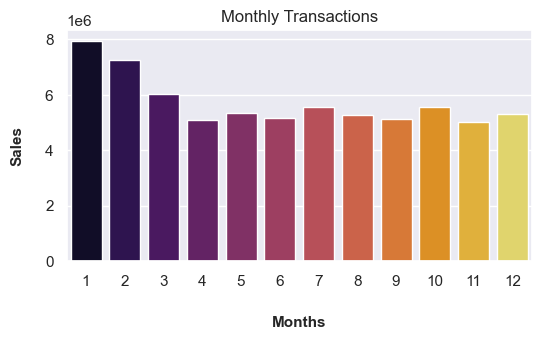

In [53]:
data["monthly_sales"] = data['invoice_date'].dt.month
total_sales_per_month =  data.groupby(['monthly_sales'],as_index = False)['price'].sum()
plt.figure(figsize = (6,3))
sns.barplot(x = "monthly_sales", y = "price", data = total_sales_per_month, palette = 'inferno')

plt.title("Monthly Transactions")
plt.xlabel('Months', weight = "bold", fontsize = 11, labelpad = 20)
plt.ylabel('Sales', weight = "bold", fontsize = 11, labelpad = 15)

Text(0, 0.5, 'sales')

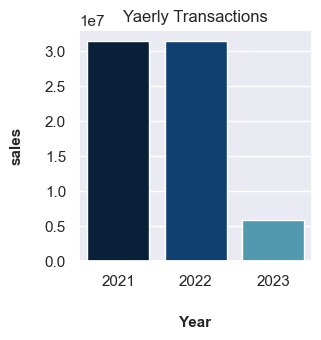

In [51]:
plt.figure(figsize = (3,3))
sns.barplot(x = "sell_year", y = "price", data = total_sales_per_year, palette = "ocean")

plt.title("Yaerly Transactions")
plt.xlabel('Year', weight = "bold", fontsize = 11, labelpad = 20)
plt.ylabel('sales', weight = "bold", fontsize = 11, labelpad = 15)

##### In comparison to 2023, there was more sales in 2021 and 2022, it is really a concerninng matter